In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import sample as sm
import snake as arch 
import torch
# warnings.filterwarnings('ignore')

In [2]:
Uo = np.load('../data/L63-trajectories/train.npy')[:, :20000]
Vo = np.load('../data/L63-trajectories/test.npy')
L0, L1 = 0.4, 3.5
D, D_r, B = 3, 512, 2
beta = 4e-5
m = 500

In [3]:
B = 1
rf1 = arch.DeepRF(D_r, B, L0, L1, Uo, beta, name='snake', save_folder=f'../data/chain/depth-{B}')
rf1.init()
rf1.net(torch.from_numpy(Uo[:, 0])), rf1.net(torch.from_numpy(Uo[:, 0:3]))
tau1 = rf1.compute_tau_f_(Vo[0:m])

Time taken by sample is 0.0093 seconds
Time taken by sample is 0.0097 seconds
Time taken by compute_tau_f_ is 14.0516 seconds


In [4]:
B = 2
rf2 = arch.DeepRF(D_r, B, L0, L1, Uo, beta, name='snake', save_folder=f'../data/chain/depth-{B}')
rf2.init()
tau2 = rf2.compute_tau_f_(Vo[0:m])

Time taken by sample is 0.0094 seconds
Time taken by sample is 0.0123 seconds
Time taken by sample is 0.0230 seconds
Time taken by sample is 0.0222 seconds
Time taken by compute_tau_f_ is 26.0719 seconds


In [5]:
def get_activation(name):
    def hook(model, input, output):
        return output.detach()

B = 3
rf3 = arch.DeepRF(D_r, B, L0, L1, Uo, beta, name='snake', save_folder=f'../data/chain/depth-{B}')
rf3.init()
tau3 = rf3.compute_tau_f_(Vo[0:m])

Time taken by sample is 0.0091 seconds
Time taken by sample is 0.0092 seconds
Time taken by sample is 0.0134 seconds
Time taken by sample is 0.0198 seconds
Time taken by sample is 0.0148 seconds
Time taken by sample is 0.0193 seconds
Time taken by compute_tau_f_ is 37.7410 seconds


In [6]:
B = 10
rf10 = arch.DeepRF(D_r, B, L0, L1, Uo, beta, name='snake', save_folder=f'../data/chain/depth-{B}')
rf10.init()
tau10 = rf10.compute_tau_f_(Vo[0:m])

Time taken by sample is 0.0097 seconds
Time taken by sample is 0.0094 seconds
Time taken by sample is 0.0136 seconds
Time taken by sample is 0.0154 seconds
Time taken by sample is 0.0229 seconds
Time taken by sample is 0.0202 seconds
Time taken by sample is 0.0179 seconds
Time taken by sample is 0.0192 seconds
Time taken by sample is 0.0142 seconds
Time taken by sample is 0.0202 seconds
Time taken by sample is 0.0094 seconds
Time taken by sample is 0.0247 seconds
Time taken by sample is 0.0176 seconds
Time taken by sample is 0.0170 seconds
Time taken by sample is 0.0174 seconds
Time taken by sample is 0.0295 seconds
Time taken by sample is 0.0145 seconds
Time taken by sample is 0.0199 seconds
Time taken by sample is 0.0264 seconds
Time taken by sample is 0.0154 seconds
Time taken by compute_tau_f_ is 123.9796 seconds


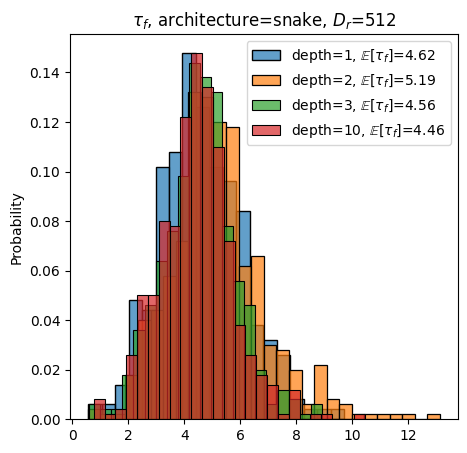

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
sns.histplot(tau1[1], ax=ax, label=r'depth=1, $\mathbb{E}[\tau_f]$'+f'={tau1[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau2[1], ax=ax, label=r'depth=2, $\mathbb{E}[\tau_f]$'+f'={tau2[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau3[1], ax=ax, label=r'depth=3, $\mathbb{E}[\tau_f]$'+f'={tau3[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau10[1], ax=ax, label=r'depth=10, $\mathbb{E}[\tau_f]$'+f'={tau10[1].mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_title(fr'$\tau_f$, architecture=snake, $D_r$={D_r}')
plt.savefig(f'../data/plots/snake-tau_f-D_r-{D_r}.png', bbox_inches='tight', dpi=300)

In [8]:
Wb = np.random.normal(size=(3, 4))
Wb

array([[-0.86992525, -0.00436896, -0.90779523, -0.24762917],
       [ 0.49190651, -0.27710498,  0.01485395,  0.10713571],
       [ 1.28409528, -0.76664281,  1.10118756,  1.09536552]])

In [9]:
np.sign(Wb[:, -1])[np.newaxis, :]

array([[-1.,  1.,  1.]])

In [10]:
np.identity(3) * np.sign(Wb[:, -1])[:, np.newaxis]

array([[-1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [11]:
rf1.net.inner_W[0]

Linear(in_features=3, out_features=512, bias=True)

In [12]:
(rf2.net.inner_U[0].bias * rf2.net.inner_W[0].bias)

tensor([ 1.9873,  3.9857,  1.8017,  3.0922,  2.8264,  8.4091,  6.7586,  6.0326,
         2.9290,  1.5972,  5.3364,  4.3943,  3.5213,  7.6441,  0.8438,  2.2392,
         8.9562,  0.7170,  2.7934,  0.8331,  3.9467,  4.1719, 10.1736,  1.1692,
         3.3819,  1.9841,  6.4298,  0.6049,  1.6782,  4.5159,  1.7238,  4.4886,
         1.3385,  4.5165,  4.4799,  1.2459,  8.3168,  1.1917,  4.0980,  6.7641,
         4.6902,  4.1478,  6.8752,  2.8198,  3.4440,  2.4570,  1.1978,  1.2661,
         4.4673,  1.6341,  7.5108,  1.3553,  2.2283,  1.4978,  0.5491,  4.4911,
         6.2535, 10.2472,  2.1972,  6.4095,  5.1714,  1.3792,  4.1599,  1.4504,
         1.9665, 10.3832,  6.3592,  8.2464,  2.6754,  9.9274,  2.4749,  4.6532,
         2.8440,  0.4058,  1.1977,  8.3542,  2.7742,  6.3727,  3.1987,  1.9986,
         1.4423,  6.8804,  4.2328,  2.2370,  2.2991,  2.4120,  7.8748,  1.4458,
         0.4143,  4.6840,  3.4241,  0.5886,  0.5326, 10.9398,  3.4053,  6.3890,
         1.4336,  2.7018,  1.8427,  2.06

In [13]:
for name, m in rf3.net.named_modules():
        print(name, m)

 Snake(
  (inner_W): ModuleList(
    (0-2): 3 x Linear(in_features=3, out_features=512, bias=True)
  )
  (inner_U): ModuleList(
    (0-2): 3 x Linear(in_features=3, out_features=512, bias=True)
  )
  (outer): ModuleList(
    (0-2): 3 x Linear(in_features=512, out_features=3, bias=False)
  )
)
inner_W ModuleList(
  (0-2): 3 x Linear(in_features=3, out_features=512, bias=True)
)
inner_W.0 Linear(in_features=3, out_features=512, bias=True)
inner_W.1 Linear(in_features=3, out_features=512, bias=True)
inner_W.2 Linear(in_features=3, out_features=512, bias=True)
inner_U ModuleList(
  (0-2): 3 x Linear(in_features=3, out_features=512, bias=True)
)
inner_U.0 Linear(in_features=3, out_features=512, bias=True)
inner_U.1 Linear(in_features=3, out_features=512, bias=True)
inner_U.2 Linear(in_features=3, out_features=512, bias=True)
outer ModuleList(
  (0-2): 3 x Linear(in_features=512, out_features=3, bias=False)
)
outer.0 Linear(in_features=512, out_features=3, bias=False)
outer.1 Linear(in_featu